In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
x=data.drop('price',axis=1)
y=data[['price']]

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [31]:
num=["mainroad","guestroom","hotwaterheating","basement","airconditioning","airconditioning","furnishingstatus"]
cat=["area","bedrooms","bathrooms","stories","parking"]

In [48]:

def Outliers(X):   
    Q1=np.quantile(X,0.25)
    Q3=np.quantile(X,0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return np.clip(X,lower_bound,upper_bound)

In [43]:
num_pipeline=Pipeline([
    ("")
])

<Axes: ylabel='area'>

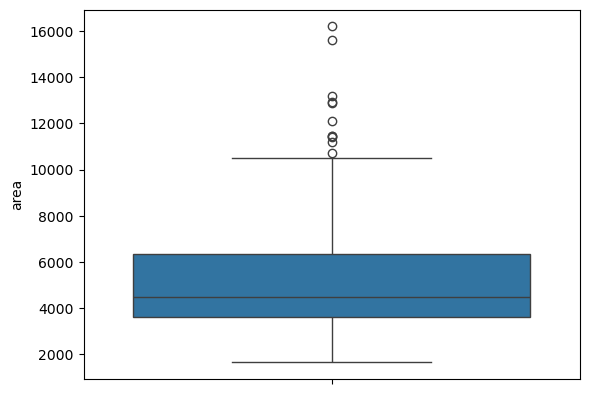

In [44]:
sns.boxplot(x_train['area'])

In [51]:
x_train['area']=Outliers(x_train['area'])

<Axes: ylabel='area'>

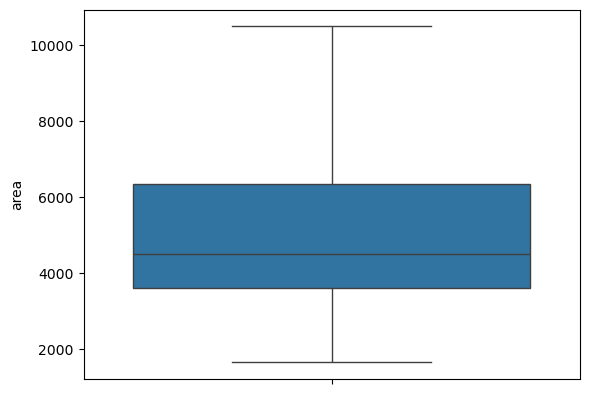

In [52]:
sns.boxplot(x_train['area'])

In [54]:
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,6000,3,2,4,yes,no,no,no,yes,1,no,furnished
93,7200,3,2,1,yes,no,yes,no,yes,3,no,semi-furnished
335,3816,2,1,1,yes,no,yes,no,yes,2,no,furnished
412,2610,3,1,2,yes,no,yes,no,no,0,yes,unfurnished
471,3750,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [55]:
x_train1=x_train.copy()

In [72]:
fit=OneHotEncoder()
x=fit.fit_transform(x_train1[['furnishingstatus']]).toarray()
x

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [80]:
# Define categorical columns
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Create preprocessing pipelines for numeric and categorical features
numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, drop='first'))
])

# Combine both pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)
# Fit and transform the data
X_processed = preprocessor.fit_transform(x_train)


In [86]:
feature_names = (numeric_features + categorical_features)
df_processed = pd.DataFrame(X_processed, columns=feature_names)

ValueError: Shape of passed values is (436, 13), indices imply (436, 12)